# New Directions in Sustainabilty for Art Education : 20 Core samples from video


Intro:
Load the viceo data and extract 20 images


Started: 13/9/2020
Updated:13/9/2020

Version: 0.01

Environment: Python 3.7.6 and Jupyter notebook

In [38]:

# import libraries
import os
import sys
import pandas as pd

from os import path

import moviepy.editor as mpy
import cv2

import numpy as np
 
from PIL import Image

In [104]:
vidfile = 'JWvideo.mp4'
folder = 'JW20frames'
iquiltname = 'JWiquilt.png'

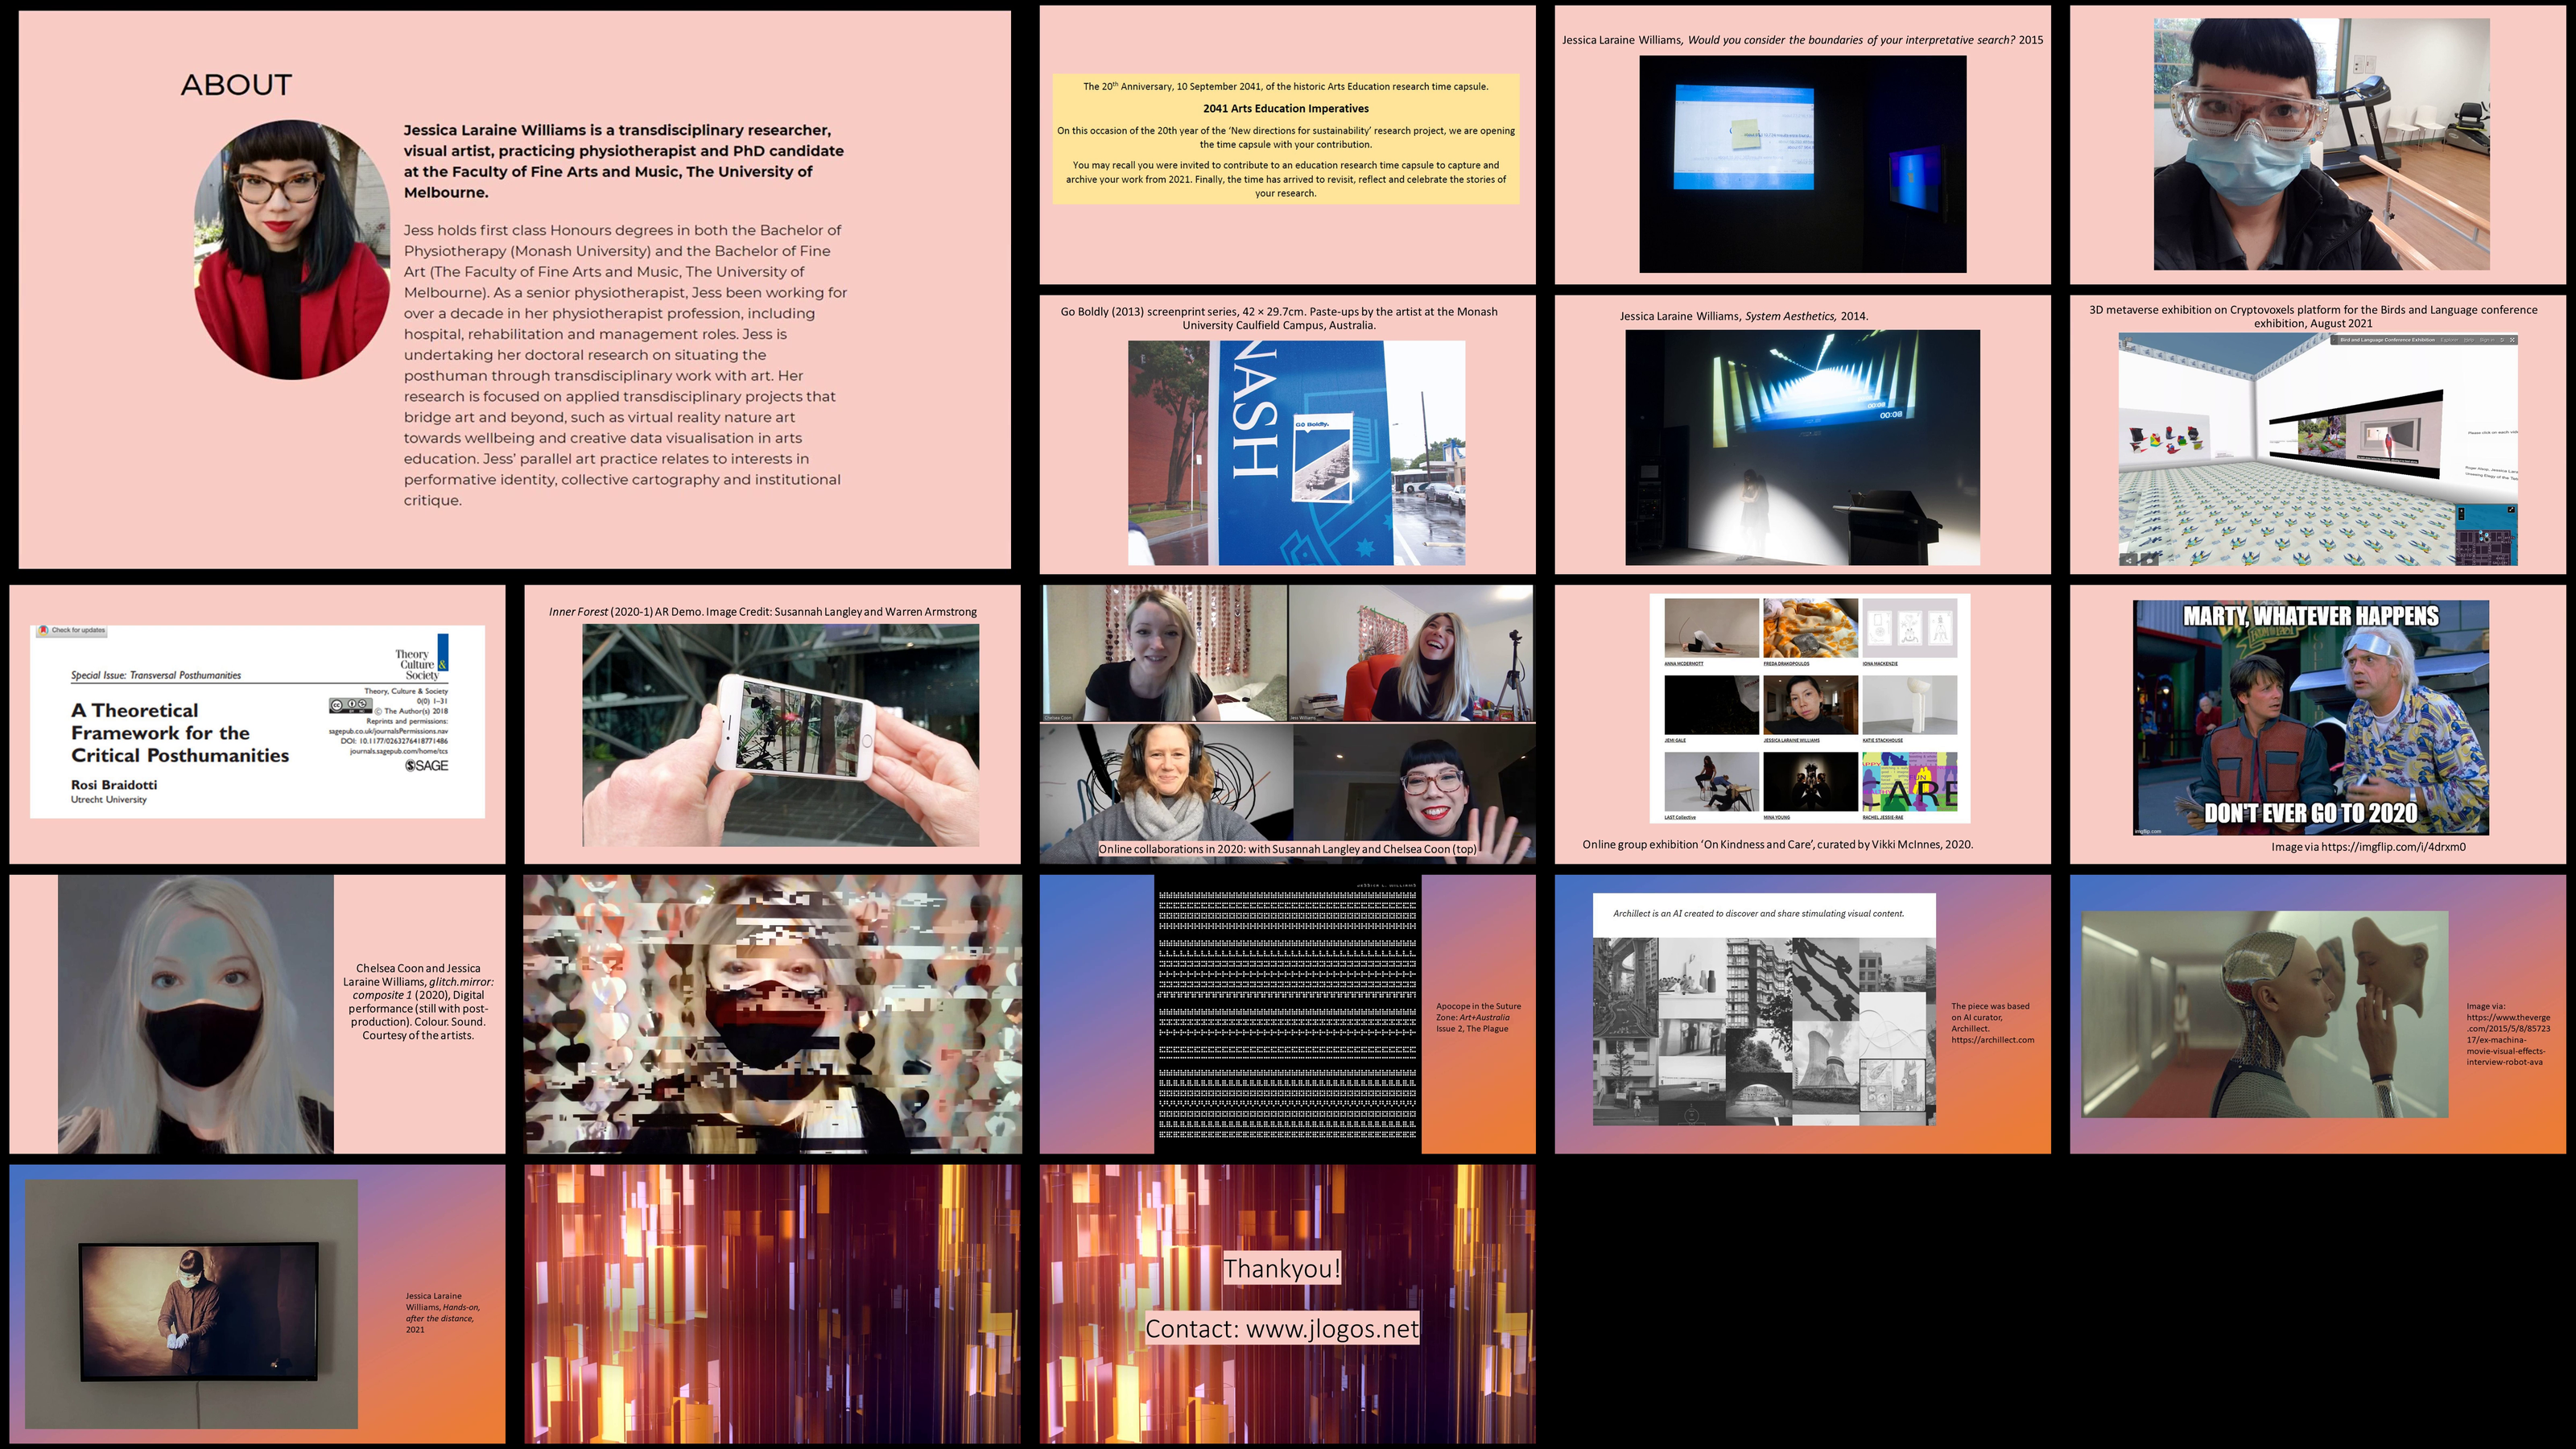

In [111]:
vidcap = cv2.VideoCapture(vidfile)

# using sample code from https://stackoverflow.com/questions/61485355/how-can-i-extract-a-frame-from-a-video-with-cv2-at-a-specific-time-in-microsecon

frames=[]

# start at 10 seconds (midway)
sec = 10
frameInterval = 20 #it will capture image in each 20 seconds
success = ExtractFrame( sec)

while success:
    sec = round(sec, 2) + frameInterval
    success = ExtractFrame(sec)

    
 # make image quilt
imquilt = MakeImageQuilt(frames)
# save to folder
imquilt.save(os.path.join(folder,iquiltname),'PNG',quality=90)
imquilt

In [97]:
i

20

In [110]:


def ExtractFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,frame = vidcap.read()
    dur = 5 # duration in seconds
    
    if not os.path.exists(folder):
        os.mkdir(folder)
    
    first = True
    if hasFrames:
        cv2.imwrite(folder+"///"+str(sec)+" sec.png", frame)     # save frame as PNG file
        frames.append(frame)
    return hasFrames




def MakeImageQuilt(frames):

    #set dimensions for large inset frame

    widthL = Image.fromarray(frames[0]).size[0]
    heightL = Image.fromarray(frames[0]).size[1]

    #set dimensions for small frames
    widthS = int(widthL/2)  # 384
    heightS = int(heightL/2) # 216

    #set dimensions for image quilt of 5 by 5 small frames (with a big inset)
    widthQ = widthS*5
    heightQ = heightS*5

    # frame0 relativePos = (0,0)
    # frame1 = (2,0)
    # frame2 = (3,0)
    # frame3 = (4,0)
    # frame4 = (2,1)
    # frame5 = (3,1)
    # frame6 = (4,1)
    # frame12 = (0,2)
    # frame17 = (0,4)
    # frame18 = (1,4)
    # frame19 = (2,4)
    # waveform = (3,4)

    # set relative positions for each frame (top left 2x2 is used for the large inset)
    relPositions = [(0,0),(2,0),(3,0),(4,0),
                    (2,1),(3,1),(4,1),
                    (0,2),(1,2),(2,2),(3,2),(4,2),
                    (0,3),(1,3),(2,3),(3,3),(4,3),
                    (0,4),(1,4),(2,4),(3,4),(4,4)]

    # waveform might be pasted at (3,4)

    rgbBlack = (0,0,0)
    imquilt = Image.new("RGB",(int(widthQ),int(heightQ)),rgbBlack)
    i = 0

    for frame in frames:
        pos = relPositions[i]
        # set the position
        xpos = int(pos[0]*widthS)
        ypos = int(pos[1]*heightS)

        # set the rescaled size
        if i == 0:
            # make the first frame a larger size
            scaledsize = (widthL,heightL)
        else:
            # make all the other frames a smaller size
            scaledsize =  (widthS,heightS)
            
        # convert colour from cv2's bgr to pil's rgb
        im_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        im = Image.fromarray(im_rgb)
        # resize image
        im = im.resize(scaledsize, Image.ANTIALIAS)

        # some debug code
        #print('pasting frame nbr '+str(i)+' at row '+str(pos[1]) +' and column '+str(pos[0]))
 
        # paste image onto quilt
        imquilt.paste(im,(xpos,ypos))
        # get ready to move onto the next frame
        i = i+1
        # just in case, if the video is longer than can fit
        # onto the image quilt then stop adding the extra frames
        if i==len(relPositions):
            break

    return imquilt
    

In [35]:
# glue all the frames into image quilt
frames[0].size


(1920, 1080)

In [36]:
1920/5

384.0

In [37]:
1080/5

216.0

In [23]:
# make a video of the frames 5 seconds each frame

vidcap = cv2.VideoCapture('q abvideo v03.mp4')

# using sample code from https://stackoverflow.com/questions/61485355/how-can-i-extract-a-frame-from-a-video-with-cv2-at-a-specific-time-in-microsecon

clips=[]


def GetFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    dur = 5 # duration in seconds
    first = True
    if hasFrames:
        cv2.imwrite("20frames/"+str(sec)+" sec.png", image)     # save frame as PNG file
        if first:
            #frame = AddFirstImageToFrame(image,scale,x,y)
            frame = image
            first=False
        else:
            frame = image
            #frame = AddImagesToFrame(frame, image, scale, x, y)
        clips.append(mpy.ImageClip(frame).set_duration(dur))
    return hasFrames



def AddFirstImageToFrame(image, scale, x, y):
    framesize = image.size
    frame = Image.new("RGB",framesize,(255,255,255))
    
    # get dimensions of the image
    width, height = image.size
    return frame


def AddImagesToFrame(frame, image, scale, x, y):
    # get dimensions of the image
    width, height = image.size
    return frame


# start at 10 seconds (midway)
sec = 10
frameRate = 20 #it will capture image in each 20 seconds
success = GetFrame(sec)

while success:
    sec = round(sec, 2)
    success = getFrame(sec)
    sec = sec + frameRate
    
# save video

concat_clip = mpy.concatenate_videoclips(clips, method="compose")
concat_clip.write_videofile("20frames/test.mp4", fps=24)

t:   0%|          | 5/2400 [00:00<00:56, 42.54it/s, now=None]

Moviepy - Building video 20frames/test.mp4.
Moviepy - Writing video 20frames/test.mp4




t:  46%|████▌     | 1104/2400 [00:29<00:32, 39.77it/s, now=None]


t:  95%|█████████▍| 2271/2400 [00:57<00:03, 40.51it/s, now=None]


t:  19%|█▉        | 462/2400 [01:38<00:46, 42.02it/s, now=None] 

Moviepy - Done !
Moviepy - video ready 20frames/test.mp4


In [11]:

audio = AudioSegment.from_file('Ok audio v05.m4a')

for i in range(4, 19):
    # pydub uses milliseconds
    start = i*20*1000
    end =start+20*1000
    print(start)
    snip = audio[start:end]

    # create a new file "first_half.mp3": 
    fname = 'snippet'+str(i).zfill(2)+'.wav'
    snip.export(fname, format="wav")

80000
100000
120000
140000
160000
180000
200000
220000
240000
260000
280000
300000
320000
340000
360000
